In [57]:
from twython import TwythonStreamer
from twitter_credentials import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from time import time
import csv

In [2]:
sid = SentimentIntensityAnalyzer()

In [63]:
class MyStreamer(TwythonStreamer):
    
    counter = 0
    limit = 0
#     data = []
    
    def on_success(self, data):
        if 'text' in data:
            if not self.limit == 0 and self.counter >= self.limit:
                self.disconnect()
                self.counter = 0
                return
            
            if 'retweeted_status' in data: # if found tweet is a retweet, return original tweet
                tweet = data['retweeted_status']
            else:
                tweet = data
                
#             print self.counter,': ', tweet['text']
#             print sid.polarity_scores(tweet['text'])
#             print

#             self.data.append(sid.polarity_scores(tweet['text'])['compound'])
            with open('data.csv', 'ab') as csvfile:
                spamwriter = csv.writer(csvfile, delimiter=' ',
                                        quotechar='|', quoting=csv.QUOTE_MINIMAL)
                spamwriter.writerow([time(), sid.polarity_scores(tweet['text'])['compound']])
                
            self.counter += 1

    def on_error(self, status_code, data):
        print status_code

        # Want to stop trying to get data because of the error?
        # Uncomment the next line!
#         self.disconnect()

In [64]:
stream = MyStreamer(twitter_credentials['API key'], twitter_credentials['API secret'],
                    twitter_credentials['token'], twitter_credentials['token secret'])
stream.limit = 40
# stream.statuses.filter(track='cheese', language='en')
stream.statuses.sample(language='en')

0 :  In class for 5 seconds
Kicked out in 5 seconds
Record!
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
1 :  https://t.co/rYmrRMWvXM PLEASE SIGN AND RE-TWEET, FOR THE UK GULF WAR VETERANS https://t.co/PbcEGGQYvU THANK YOU
{'neg': 0.212, 'neu': 0.502, 'pos': 0.286, 'compound': 0.1613}
2 :  View from the 6😍 https://t.co/MXTfqdl8rh
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
3 :  @PoloClubDubai enjoying ourselves but been waiting 30mins for a drink! Anybody here serving? ✌️🏇🏻🍾
{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3595}
4 :  It's the best when your sick after payday! You can't be out waisting your money!💸👌🏽💰
{'neg': 0.157, 'neu': 0.617, 'pos': 0.227, 'compound': 0.3578}
5 :  when she gives you the "baifelecia".. https://t.co/FAry7JEwzW
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
6 :  spencer is me. I am spencer. https://t.co/fD6NRuAOiz
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
7 :  I didn't mean for you to hang up,Sabine.
Did you 

In [38]:
# remove zeros
# [value for value in MyStreamer.data if not value == 0]

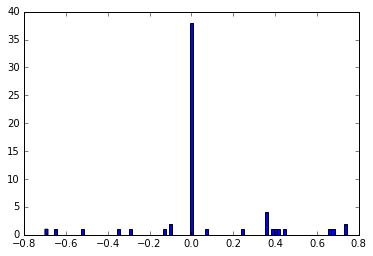

In [49]:
plt.hist(MyStreamer.data, 100)
plt.show()

In [50]:
print np.mean(MyStreamer.data)
print np.std(MyStreamer.data)

0.056565
0.273375110928
